Method 2 -  Reframe to 576 frames and Biomechanics Sensor Configuration

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import random
from google.colab import drive 
drive.mount('/content/drive')
import pickle
import matplotlib.pyplot as plt

from keras import layers 
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, Dropout, GlobalAveragePooling1D

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

Mounted at /content/drive


In [2]:
def open_pickle(path_pickle):
  f = open(path_pickle, 'rb')
  P = pickle.load(f)
  f.close()

  return P

In [3]:
X_test = open_pickle('/content/drive/MyDrive/Sam/File_saved/X_test2.pickle')
X_train = open_pickle('/content/drive/MyDrive/Sam/File_saved/X_train2.pickle')
X_valid = open_pickle('/content/drive/MyDrive/Sam/File_saved/X_valid2.pickle')
y_test = open_pickle('/content/drive/MyDrive/Sam/File_saved/y_test2.pickle')
y_valid = open_pickle('/content/drive/MyDrive/Sam/File_saved/y_valid2.pickle')
y_train = open_pickle('/content/drive/MyDrive/Sam/File_saved/y_train2.pickle')

#1 - Basic CNN model from Gab's first model

In [4]:
model = models.Sequential()
model.add(layers.Conv1D(filters = 32, kernel_size = 9, activation='relu', input_shape=(X_train.shape[1:]),padding='same')) 
model.add(layers.MaxPooling1D(pool_size = 2))
model.add(layers.Conv1D(filters = 32, kernel_size = 9, activation='relu',padding='same'))
model.add(layers.Conv1D(filters = 32, kernel_size = 9, activation='relu',padding='same'))
model.add(layers.Flatten()) 
model.add(layers.Dense(32, activation='relu')) 
model.add(layers.Dense(7, activation='softmax')) 
model.compile(optimizer = 'rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs = 30, batch_size = 128, validation_data = (X_valid, y_valid))

Epoch 1/30
18/18 [==============================] - 10s 23ms/step - loss: 1.3617 - accuracy: 0.5007 - val_loss: 0.8281 - val_accuracy: 0.6618
Epoch 2/30
18/18 [==============================] - 0s 9ms/step - loss: 0.6833 - accuracy: 0.7636 - val_loss: 0.4815 - val_accuracy: 0.8176
Epoch 3/30
18/18 [==============================] - 0s 8ms/step - loss: 0.4795 - accuracy: 0.8263 - val_loss: 0.4443 - val_accuracy: 0.8500
Epoch 4/30
18/18 [==============================] - 0s 9ms/step - loss: 0.4252 - accuracy: 0.8424 - val_loss: 0.3762 - val_accuracy: 0.8588
Epoch 5/30
18/18 [==============================] - 0s 9ms/step - loss: 0.3559 - accuracy: 0.8663 - val_loss: 0.4032 - val_accuracy: 0.8588
Epoch 6/30
18/18 [==============================] - 0s 8ms/step - loss: 0.2915 - accuracy: 0.8899 - val_loss: 0.4556 - val_accuracy: 0.8412
Epoch 7/30
18/18 [==============================] - 0s 8ms/step - loss: 0.2429 - accuracy: 0.9094 - val_loss: 0.4279 - val_accuracy: 0.8235
Epoch 8/30
18/18 [

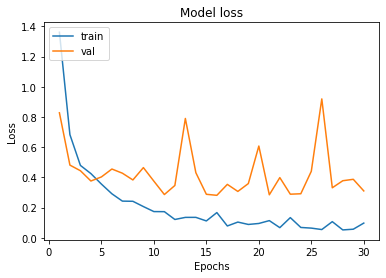

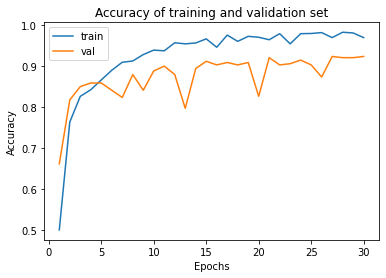

In [5]:
#plot train/validation loss and train/validation accuracy 
history_dict = history.history
loss_values=history_dict['loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs,history_dict['loss'])
plt.plot(epochs, history_dict['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

accuracy_values = history_dict['accuracy']
val_accuracy= history_dict['val_accuracy']
plt.plot(epochs, accuracy_values)
plt.plot(epochs, val_accuracy)
plt.title('Accuracy of training and validation set') 
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()